## Get the Data

> Importing Libraries

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)
import seaborn as sns
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

> Importing Yahoo Finance data

In [8]:
from datetime import date, timedelta

today = date.today() + timedelta(days = 1)

startDate = (today - timedelta(days = 1000)).strftime('%Y-%m-%d')
 
endDate = today.strftime('%Y-%m-%d')

dataFrame = yf.download("BTC-USD",start = startDate,end = endDate,process = False)

dataFrame['Date'] = dataFrame.index

dataFrame.reset_index(drop = True, inplace= True)

dataFrame.to_csv("data.csv",index = False)

dataFrame.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
0,8162.190918,8218.359375,8029.642090,8037.537598,8037.537598,25521165085,2020-01-11
1,8033.261719,8200.063477,8009.059082,8192.494141,8192.494141,22903438381,2020-01-12
2,8189.771973,8197.788086,8079.700684,8144.194336,8144.194336,22482910688,2020-01-13
3,8140.933105,8879.511719,8140.933105,8827.764648,8827.764648,44841784107,2020-01-14
4,8825.343750,8890.117188,8657.187500,8807.010742,8807.010742,40102834650,2020-01-15


## Preprocess the data

get the data form csv file

In [9]:

df = pd.read_csv('data.csv')

df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,8162.190918,8218.359375,8029.642090,8037.537598,8037.537598,25521165085,2020-01-11
1,8033.261719,8200.063477,8009.059082,8192.494141,8192.494141,22903438381,2020-01-12
2,8189.771973,8197.788086,8079.700684,8144.194336,8144.194336,22482910688,2020-01-13
3,8140.933105,8879.511719,8140.933105,8827.764648,8827.764648,44841784107,2020-01-14
4,8825.343750,8890.117188,8657.187500,8807.010742,8807.010742,40102834650,2020-01-15


In [10]:
import numpy as np

print("\n")
print("Open   --- mean :", np.mean(df['Open']),  "  \t Std: ", np.std(df['Open']),  "  \t Max: ", np.max(df['Open']),  "  \t Min: ", np.min(df['Open']))
print("High   --- mean :", np.mean(df['High']),  "  \t Std: ", np.std(df['High']),  "  \t Max: ", np.max(df['High']),  "  \t Min: ", np.min(df['High']))
print("Low    --- mean :", np.mean(df['Low']),   "  \t Std: ", np.std(df['Low']),   "  \t Max: ", np.max(df['Low']),   "  \t Min: ", np.min(df['Low']))
print("Close  --- mean :", np.mean(df['Close']), "  \t Std: ", np.std(df['Close']), "  \t Max: ", np.max(df['Close']), "  \t Min: ", np.min(df['Close']))
print("Volume --- mean :", np.mean(df['Volume']),"  \t Std: ", np.std(df['Volume']),"  \t Max: ", np.max(df['Volume']),"  \t Min: ", np.min(df['Volume']))



Open   --- mean : 30037.171386230955   	 Std:  17459.942401264216   	 Max:  67549.734375   	 Min:  5002.578125
High   --- mean : 30799.312959501436   	 Std:  17912.140455701454   	 Max:  68789.625   	 Min:  5331.833984375
Low    --- mean : 29177.726226898103   	 Std:  16923.20232894035   	 Max:  66382.0625   	 Min:  4106.98095703125
Close  --- mean : 30044.540772216063   	 Std:  17443.481382015874   	 Max:  67566.828125   	 Min:  4970.7880859375
Volume --- mean : 37453233680.75424   	 Std:  18843243771.90879   	 Max:  350967941479   	 Min:  12252601475


> **Note**:
- mean : giá trị trung bình
- std : độ lệch chuẩn
- max : giá trị lớn nhất 
- min : giá trị nhỏ nhất


> Xoá những giá trị không cần thiết (date và high value)

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1001 non-null   float64
 1   High       1001 non-null   float64
 2   Low        1001 non-null   float64
 3   Close      1001 non-null   float64
 4   Adj Close  1001 non-null   float64
 5   Volume     1001 non-null   int64  
 6   Date       1001 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 54.9+ KB


không có data bị miss lên mình bỏ qua bước fixing missdata

> tiền xử lý

In [12]:
import preprocess_data as ppd
data = ppd.remove_data(df)

#Print the dataframe head and tail
print(data.head())
print("---")
print(data.tail())


   Item         Open        Close       Volume
0     0  8162.190918  8037.537598  25521165085
1     1  8033.261719  8192.494141  22903438381
2     2  8189.771973  8144.194336  22482910688
3     3  8140.933105  8827.764648  44841784107
4     4  8825.343750  8807.010742  40102834650
---
      Item          Open         Close       Volume
996    996  19044.068359  19623.580078  30484729489
997    997  19623.583984  20336.843750  35887278685
998    998  20335.900391  20160.716797  33223790572
999    999  20161.039062  19955.443359  34711412966
1000  1000  19962.253906  19937.210938  29604626432


### data encryption

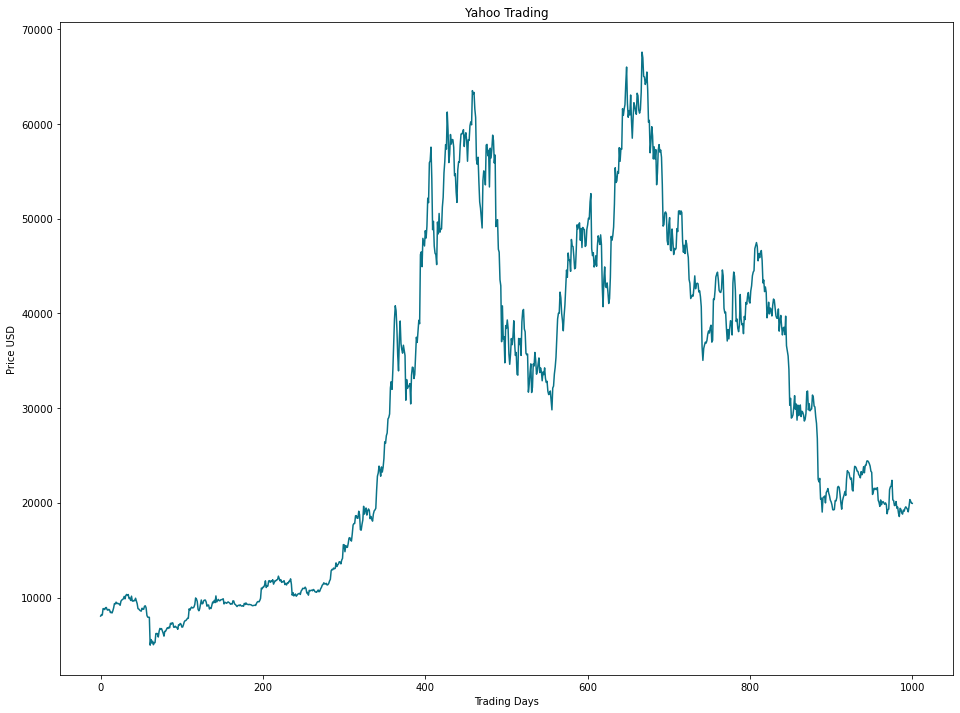

In [13]:
import visualize

visualize.plot_basic(data)

In [14]:
data = ppd.get_normalised_data(data)
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))

   Item      Open     Close    Volume
0     0  0.050516  0.048993  0.039173
1     1  0.048454  0.051468  0.031445
2     2  0.050957  0.050697  0.030203
3     3  0.050176  0.061617  0.096214
4     4  0.061118  0.061285  0.082223


Open   --- mean : 0.40025150242111834   	 Std:  0.27914846090647333   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.4005645192672173   	 Std:  0.2786674903257528   	 Max:  0.9999999999999999   	 Min:  0.0
Volume --- mean : 0.07440062267465253   	 Std:  0.055631503939816515   	 Max:  1.0   	 Min:  0.0


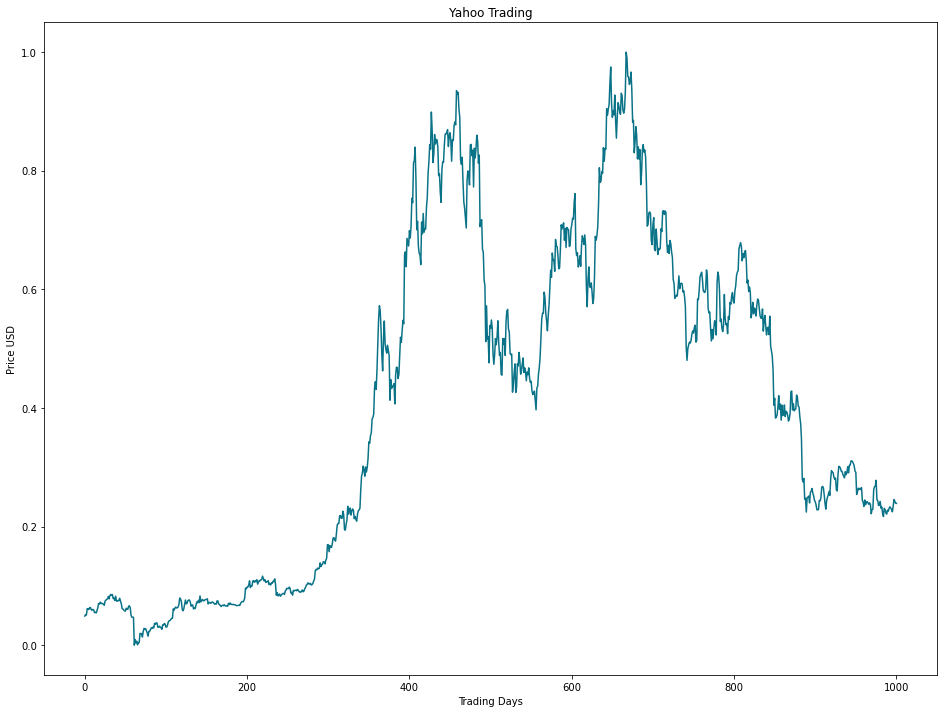

In [15]:
visualize.plot_basic(data)

In [16]:
data.to_csv('data_preprocess.csv',index = False)

In [17]:
stocks  = pd.read_csv('data_preprocess.csv')

display(stocks)

,Item,Open,Close,Volume
0,0,0.050516,0.048993,0.039173
1,1,0.048454,0.051468,0.031445
2,2,0.050957,0.050697,0.030203
3,3,0.050176,0.061617,0.096214
4,4,0.061118,0.061285,0.082223
...,...,...,...,...
996,996,0.224494,0.234085,0.053827
997,997,0.233760,0.245480,0.069777
998,998,0.245148,0.242666,0.061914
999,999,0.242353,0.239387,0.066306


###  Bench Mark Model


In [18]:
# include

import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

In [19]:
# splitting the dataset

X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (801, 1)
y_train (801, 1)
x_test (200, 1)
y_test (200, 1)


Train a Linear regressor model on training set 

In [20]:
model = LinearRegressionModel.build_model(X_train,y_train)

Get prediction on test set

In [21]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

Plot the predicted values against actual

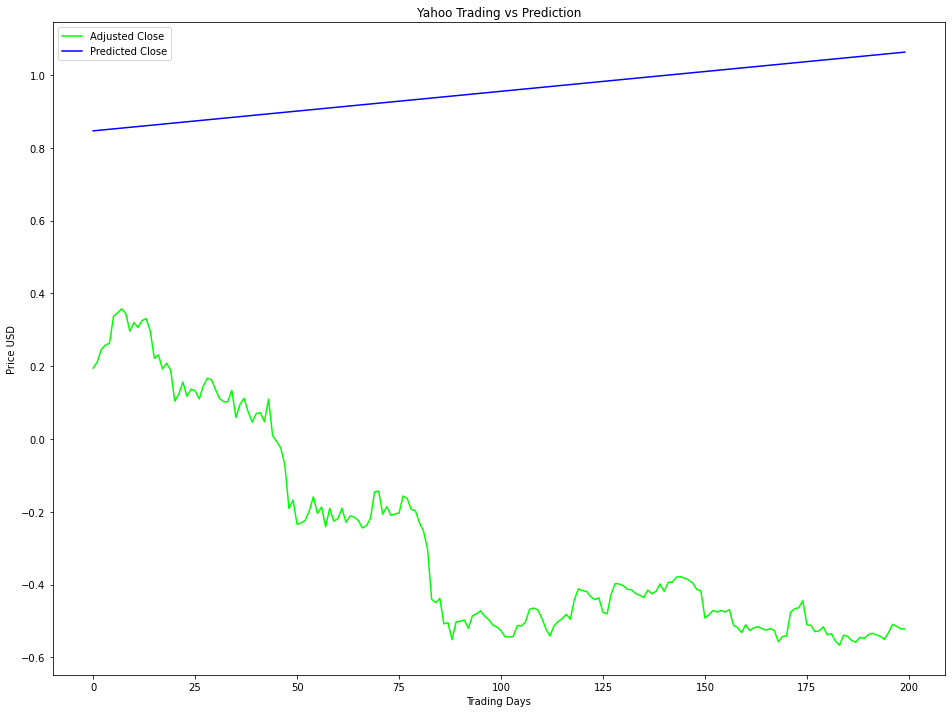

In [22]:
vs.plot_prediction(y_test,predictions)

measure accuracy of the prediction

### Long-Sort Term Memory Model

include

In [23]:
#mport import_iynb

import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import *
from tensorflow import keras
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

In [24]:
import visualize as vs
import stock_data as sd
import LinearRegressionModel

In [25]:
stocks_data = data.drop(['Item'], axis =1)

In [26]:
display(stocks_data.head())

,Open,Close,Volume
0,0.050516,0.048993,0.039173
1,0.048454,0.051468,0.031445
2,0.050957,0.050697,0.030203
3,0.050176,0.061617,0.096214
4,0.061118,0.061285,0.082223


Split train and test data sets and Unroll train and test data for lstm model

In [27]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 10)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (490, 50, 3)
y_train (490,)
x_test (391, 50, 3)
y_test (391,)


Build a basic Long-Short Term Memory model

In [28]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.015769243240356445


train the model

In [29]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

15/15 [==============================] - 15s 279ms/step - loss: 0.0432 - val_loss: 0.0030


In [30]:
#prediction using test data

predictions = model.predict(X_test)

13/13 [==============================] - 3s 32ms/step


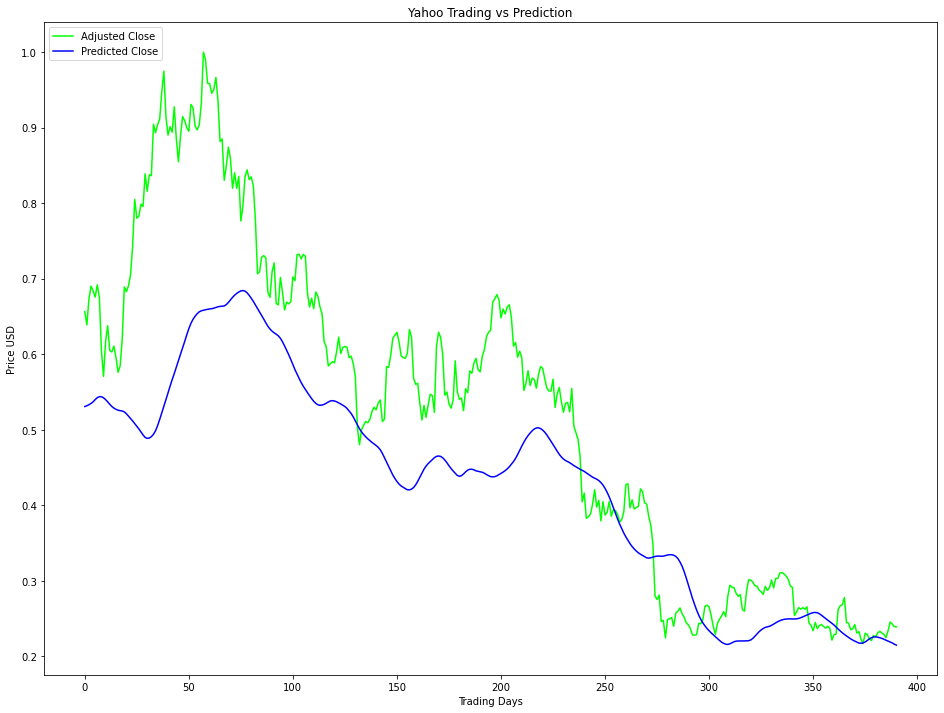

In [31]:
    vs.plot_lstm_prediction(y_test,predictions)

In [32]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01427771 MSE (0.11948938 RMSE)
Test Score: 0.01946736 MSE (0.13952549 RMSE)


### Improved LSTM Model

In [33]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0


In [34]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
5/5 - 16s - loss: 0.0656 - val_loss: 0.0604 - 16s/epoch - 3s/step
Epoch 2/5
5/5 - 1s - loss: 0.0147 - val_loss: 9.8135e-04 - 1s/epoch - 223ms/step
Epoch 3/5
5/5 - 1s - loss: 0.0142 - val_loss: 3.3761e-04 - 1s/epoch - 216ms/step
Epoch 4/5
5/5 - 1s - loss: 0.0090 - val_loss: 0.0129 - 1s/epoch - 210ms/step
Epoch 5/5
5/5 - 1s - loss: 0.0098 - val_loss: 0.0057 - 1s/epoch - 213ms/step


In [35]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

4/4 [==============================] - 3s 79ms/step


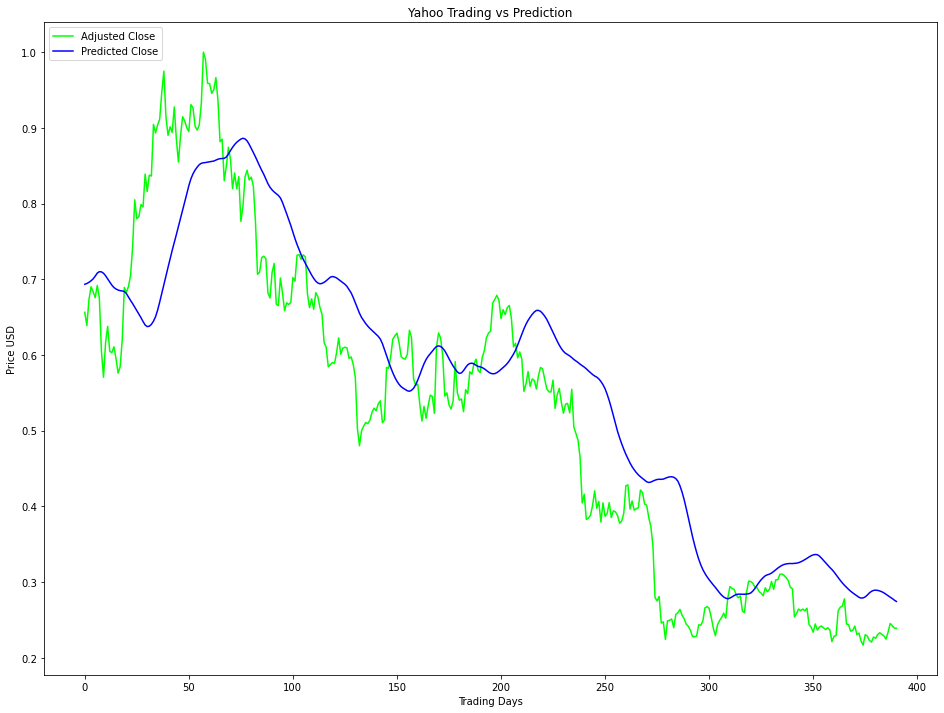

In [36]:
    vs.plot_lstm_prediction(y_test,predictions)

In [37]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00691059 MSE (0.08312998 RMSE)
Test Score: 0.00908274 MSE (0.09530341 RMSE)


In [38]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.009083 - RMSE * Adjusted Close Range


### Checking Robustness of the model

In [44]:
import preprocess_data as ppd
import visualize as vs
import pandas as pd
import stock_data as sd

data = pd.read_csv('data_preprocess.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].values
Y = stocks[:]['Close'].values

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictionsX = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.050516  0.048993  0.039173
1  0.048454  0.051468  0.031445
2  0.050957  0.050697  0.030203
3  0.050176  0.061617  0.096214
4  0.061118  0.061285  0.082223
(1000, 1, 3)
(1000,)
32/32 [==============================] - 0s 4ms/step
Test Score: 0.2076 MSE (0.4556 RMSE)
